In [90]:
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
DX = 0.1
COLS = ['Inter','SS','CA1','Oligo','Astro','Endo','Micro'] 
df = pd.read_csv('_All_cell_2_promotors_expression_summary_majorMinor.txt', sep='\t')
df = df.set_index('Label')
df.head()

,Distance,Astro_m1,Astro_m2,Endo_m1,Endo_m2,Inter_m1,Inter_m2,Micro_m1,Micro_m2,Oligo_m1,Oligo_m2,CA1_m1,CA1_m2,SS_m1,SS_m2,All_m1,All_m2
Label,,,,,,,,,,,,,,,,,
Xkr4,33,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
Rp1,48997,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Sox17,7,2,1,26,15,0,0,3,0,8,2,9,0,0,1,48,19
Rgs20,50892,3,0,0,0,0,0,0,0,2,0,2,0,5,0,12,0
ENSMUST00000159618,1,0,0,0,0,2,0,0,1,6,3,14,5,4,2,26,11


In [92]:
df['allSum'] = df['All_m1'] + df['All_m2']
df = df.sort(['allSum'], ascending=False)
df = df[1:11]                             # tag bort raden 'Plp1'
df

,Distance,Astro_m1,Astro_m2,Endo_m1,Endo_m2,Inter_m1,Inter_m2,Micro_m1,Micro_m2,Oligo_m1,Oligo_m2,CA1_m1,CA1_m2,SS_m1,SS_m2,All_m1,All_m2,allSum
Label,,,,,,,,,,,,,,,,,,
Calm1,19,1370,32,2085,48,11437,988,477,19,13663,402,57450,4160,27829,1830,114311,7479,121790
Tmsb4x,300,925,0,5213,0,6071,0,3224,0,22233,0,56607,0,10414,0,104687,0,104687
Fth1,133,1683,0,1404,2,3038,2,1246,1,47498,32,24455,25,6424,8,85748,70,85818
Ubb,12,1147,0,2280,2,10782,13,772,0,18897,9,28033,63,11668,26,73579,113,73692
Trf,7138,285,3,33,0,418,5,125,9,37922,542,937,18,1003,17,40723,594,41317
Cst3,4,10588,1089,776,390,1118,1442,3302,583,5004,1191,7152,2552,1444,818,29384,8065,37449
Usmg5,19,606,5,477,3,5124,33,176,0,4060,27,17714,175,7473,42,35630,285,35915
Hsp90aa1,9,576,19,406,11,4756,292,153,1,8175,230,14880,621,5177,333,34123,1507,35630
Sub1,926,505,0,574,0,4326,0,189,0,3148,0,20430,0,6344,0,35516,0,35516


In [93]:
for col in COLS:
    df[col] = (df[col+'_m1']) / (df[col+'_m2']) 
df = df[COLS]
df = df.transpose()
df

Label,Calm1,Tmsb4x,Fth1,Ubb,Trf,Cst3,Usmg5,Hsp90aa1,Sub1,Dynll1
Inter,11.575911,inf,1519.000000,829.384615,83.600000,0.775312,155.272727,16.287671,inf,17.977273
SS,15.207104,inf,803.000000,448.769231,59.000000,1.765281,177.928571,15.546547,inf,31.605714
CA1,13.810096,inf,978.200000,444.968254,52.055556,2.802508,101.222857,23.961353,inf,29.548780
Oligo,33.987562,inf,1484.312500,2099.666667,69.966790,4.201511,150.370370,35.543478,inf,70.246753
Astro,42.812500,inf,inf,inf,95.000000,9.722681,121.200000,30.315789,inf,116.750000
Endo,43.437500,inf,702.000000,1140.000000,inf,1.989744,159.000000,36.909091,inf,50.937500
Micro,25.105263,inf,1246.000000,inf,13.888889,5.663808,inf,153.000000,inf,120.000000


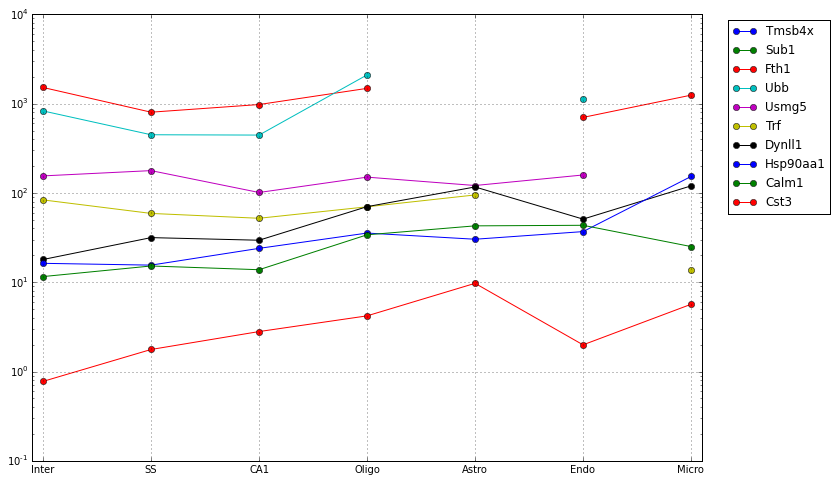

In [94]:
for col in ['Tmsb4x','Sub1','Fth1','Ubb','Usmg5','Trf','Dynll1','Hsp90aa1','Calm1','Cst3']: 
    plt = df[col].plot(marker='o', figsize=(12,8), xlim=(0-DX,6+DX))
plt.set_yscale('log')
plt.legend(bbox_to_anchor=(1.2, 1.0))